In [51]:
import pandas as pd
import statistics as st

In [52]:
churn_data = pd.read_csv('DS1_C7_Part2_BankChurn_Data.csv')
churn_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [4]:
churn_data.shape

(10127, 20)

## Display Summary Statistics
> Measures of Central Tendency
- mean
- median
- mode
> Mesures of Dispersion
- mean
- std
- cov

In [63]:
churn_stats = churn_data.describe(include = 'all')
churn_stats.fillna('None',inplace = True)
churn_stats.drop(['CLIENTNUM','Attrition_Flag'],axis = 1)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.0,10127,10127.0,10127,10127,10127,9995,10127,10127.0,10127.0,10127.0,10127.0,10067.0,10127.0,10127.0,10127.0,10127.0,10127.0
unique,None,2,None,7,4,6,4,4,None,None,None,None,None,None,None,None,None,None
top,None,F,None,Graduate,Married,Less than $40K,Blue,England,None,None,None,None,None,None,None,None,None,None
freq,None,5356,None,3128,4687,3561,9315,5393,None,None,None,None,None,None,None,None,None,None
mean,46.382245,None,2.7874,None,None,None,None,None,35.928409,3.81258,2.341167,2.455317,8703.18055,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,8.341393,None,6.479135,None,None,None,None,None,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.47257,0.275691
min,18.0,None,0.0,None,None,None,None,None,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,510.0,10.0,0.0
25%,41.0,None,1.0,None,None,None,None,None,31.0,3.0,2.0,2.0,2555.5,359.0,1324.5,2155.5,45.0,0.023
50%,46.0,None,2.0,None,None,None,None,None,36.0,4.0,2.0,2.0,4557.0,1276.0,3474.0,3899.0,67.0,0.176
75%,52.0,None,3.0,None,None,None,None,None,40.0,5.0,3.0,3.0,11127.5,1784.0,9859.0,4741.0,81.0,0.503


# Discuss possible reasons for the influx in inactive customers
## Analyze the correlation between attrition vs average utilization ratio

### Analyze the correlation between Attrition and Gender

In [56]:
churn_data.sort_index(ascending= False)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,Scotland,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105


In [57]:
pd.crosstab(churn_data.Attrition_Flag,churn_data.Gender,rownames=['Attrition_Flag'],colnames=['Gender'])

Gender,F,M
Attrition_Flag,,
Attrited Customer,932,695
Existing Customer,4424,4076


### Analyze the correlation between Attrition and Education Level

In [58]:
pd.crosstab(churn_data.Attrition_Flag,churn_data.Education_Level,rownames=['Attrition_Flag'],colnames=['Education_Level'])

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256
Existing Customer,859,356,2641,1707,424,1250,1263


In [ ]:
churn_data.groupby('Attrition_Flag')['CLIENTNUM'].count()

### Analyze the correlation between attrition and Marital Status

In [67]:
pd.crosstab(churn_data.Marital_Status,churn_data.Attrition_Flag,rownames=['Marital_Status'],colnames=['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


### Analyze the correlation between attrition and Income Category

In [66]:
pd.crosstab(churn_data.Income_Category,churn_data.Attrition_Flag,rownames=['Income_Category'],colnames=['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


## Identify and remove outliers in the data set
remove data that is less than or greater than max and min
- months on book
- total trans count
- Credit_Limit

In [4]:
# IDENTIFY COLUMN NAMES
cols = ['Months_on_book','Total_Trans_Ct','Credit_Limit']
# ITERATE OVER THE 3 COLUMN NAMES IN THE LIST cols
for value in cols:
    LO=[] # lower outlier list
    UO=[] # upper outlier list
    
    value_series=pd.Series(churn_data[value]) # converts each col to a series (1 column)
    
    Min = min(value_series) # calculate min value
    Max=max(value_series) # calculate max value
    Range=Max-Min # calculate range
    
    Q1=value_series.quantile(0.25) # quartile 1
    Q3=value_series.quantile(0.75) # quartile 3
    IQR=Q3-Q1 # calcualte iqr
    
    UF=Q3 + 1.5*IQR # calculate  upper fence
    LF=Q1 - 1.5*IQR # calculate lower fence
# EXTRACT OUTLIERS: LESS THAN LOWER FENCE, GREATER THAN UPPER FENCE 
    for i in churn_data[value]:
        if(i<LF):
            LO.append(i)
        if(i>UF):
            UO.append(i)
    # stores all values in respective list
    
    if(value =='Months_on_book'):
        Months_on_book =['Months_on_book',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    elif (value=='Total_Trans_Ct'):
        Total_Trans_Ct =['Total_Trans_Ct',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]
    else:
        Credit_Limit =['Credit_Limit',Min,Max,Range,Q1,Q3,IQR,LF,UF,[LO,UO]]

In [5]:
# creating a df to store all calculated values
col_names=['Churn Data','Min','Max','Range','Q1','Q3','IQR','Lower Fence','Upper Fence','Outliers']

outliers_data=pd.DataFrame([Months_on_book,Total_Trans_Ct,Credit_Limit],columns=col_names)

print(outliers_data)

       Churn Data     Min      Max    Range      Q1       Q3     IQR  \
0  Months_on_book    13.0     56.0     43.0    31.0     40.0     9.0   
1  Total_Trans_Ct    10.0    139.0    129.0    45.0     81.0    36.0   
2    Credit_Limit  1438.3  34664.0  33225.7  2555.5  11127.5  8572.0   

   Lower Fence  Upper Fence                                           Outliers  
0         17.5         53.5  [[13, 13, 13, 15, 17, 13, 13, 13, 17, 17, 13, ...  
1         -9.0        135.0                                   [[], [139, 138]]  
2     -10302.5      23985.5  [[], [34516.0, 29081.0, 30367.0, 32426.0, 3451...  


### Remove Outliers from Churn Data 
> Outliers are between the max and upper fence and min and lower fence 

In [6]:
# REMOVE THE INDEX WITH CREDIT LIMIT OUTSIDE OF MAX AND MIN (Outliers)
credit_df = churn_data['Credit_Limit']

In [7]:
# df to series
credit_series = pd.Series(credit_df)
Q1_CR=credit_series.quantile(0.25) # quartile 1
Q3_CR=credit_series.quantile(0.75) # quartile 3
# CALCULATE IQR
IQR_CR = Q3_CR - Q1_CR   
# CALCULATE UF
UF_CR = Q3_CR + 1.5 * IQR_CR
# CALCULATE LF
LF_CR = Q1_CR - 1.5 * IQR_CR
# EXTRACT THE MIN VALUES FROM THE CREDIT LIMIT COLUMN
min_credit = min(credit_df)
# EXTRACT THE MAX VALUES FROM THE CREDIT LIMIT COLUMN
max_credit = max(credit_df)
print("Upper Fence: ", UF_CR)
print("Lower Fence: ", LF_CR)
print("Min: ",min_credit)
print("Max: ",max_credit)

Upper Fence:  23985.5
Lower Fence:  -10302.5
Min:  1438.3
Max:  34664.0


In [8]:
#  EXTRACT THE VALUES GREATER THAN THE lower fence AND LESS THAN THE MINIMUM
#  OUTLIERS
below_min_CR = credit_df[(credit_df > -10302) & (credit_df < 1438)]
below_min_CR

Series([], Name: Credit_Limit, dtype: float64)

In [9]:
#  EXTRACT THE ROWS WITH CREDIT LIMITS GREATER THAN THE upper fence AND LESS THAN THE MAXIMUM
below_max_CR = credit_df[(credit_df < max_credit) & (credit_df > UF_CR )].sort_values()
print("outliers: \n",below_max_CR)
print("=========\n")
# EXTRACT ROW INDEX OF CUSTOMERS WITH OUTLIER CREDIT LIMIT DATA
below_max_CR_index = below_max_CR.index
print("Outlier Rows: \n",below_max_CR_index)

outliers: 
 896     23991.0
1514    23996.0
9725    24001.0
3641    24016.0
5864    24028.0
         ...   
8009    34644.0
7707    34647.0
7592    34649.0
4489    34663.0
3072    34663.0
Name: Credit_Limit, Length: 984, dtype: float64

Outlier Rows: 
 Int64Index([ 896, 1514, 9725, 3641, 5864, 4662, 2431, 3433, 9423, 3359,
            ...
            7917, 3631, 1625,  335, 6983, 8009, 7707, 7592, 4489, 3072],
           dtype='int64', length=984)


In [10]:
# CREATE A COPY TO MANIPULATE THE DF
churn_copy = churn_data.copy()
# USE THE df.drop() METHOD AND THE labels ATTRIBUTE 
churn_copy = churn_copy.drop(labels = below_max_CR_index)

print("With outliers removed \n",churn_copy)
print("With outliers \n",churn_data)

With outliers removed 
        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Categor

In [18]:
churn_copy

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


### Remove the outliers from the Total_Trans_ct and Months on book columns

In [12]:
total_tcount_df = churn_data['Total_Trans_Ct']


In [13]:
# df to series
total_tcount_series = pd.Series(total_tcount_df)
Q1_TC = total_tcount_series.quantile(0.25) # quartile 1
Q3_TC = total_tcount_series.quantile(0.75) # quartile 3

# CALCULATE IQR
IQR_TC = Q3_TC - Q1_TC   

# CALCULATE UF
UF_TC = Q3_TC + 1.5*IQR_TC
# CALCULATE LF
LF_TC = Q1_TC - 1.5*IQR_TC
# EXTRACT THE MIN VALUES FROM THE CREDIT LIMIT COLUMN
min_total_tcount = min(total_tcount_df)
# EXTRACT THE MAX VALUES FROM THE CREDIT LIMIT COLUMN
max_total_tcount = max(total_tcount_df)
print("Upper Fence: ", UF_TC)
print("Lower Fence: ", LF_TC)
print("Min: ",min_total_tcount)
print("Max: ",max_total_tcount)

Upper Fence:  135.0
Lower Fence:  -9.0
Min:  10
Max:  139


In [15]:
#  EXTRACT THE VALUES GREATER THAN THE lower fence AND LESS THAN THE MINIMUM
#  OUTLIERS
below_minTC= total_tcount_df[(total_tcount_df > LF_TC) & (total_tcount_df < min_total_tcount)]
print("outlier: \n",below_minTC)

#  EXTRACT THE VALUES GREATER THAN THE upper fence AND LESS THAN THE MAXIMUM
#  OUTLIERS
below_maxTC = total_tcount_df[(total_tcount_df < max_credit) & (total_tcount_df > UF_TC )]
print("outliers: \n",below_maxTC)

outlier: 
 Series([], Name: Total_Trans_Ct, dtype: int64)
outliers: 
 9324    139
9586    138
Name: Total_Trans_Ct, dtype: int64


In [22]:
# EXTRACT ROW INDEX OF CUSTOMERS WITH OUTLIER CREDIT LIMIT DATA
below_maxTC_index = below_maxTC.index
# print("Outlier Rows: \n",below_maxTC_index)
below_maxTC_index = below_maxTC_index[1] # row 9324 has already been removed

In [23]:
# USE THE df.drop() METHOD AND THE labels ATTRIBUTE 
churn_copy = churn_copy.drop(labels = below_maxTC_index)

print("With outliers removed \n",churn_copy)
print("With outliers \n",churn_data)

With outliers removed 
        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Categor

In [24]:
months_df = churn_data['Months_on_book']

In [25]:
# df to series
months_series = pd.Series(months_df)
Q1_M = months_series.quantile(0.25) # quartile 1
Q3_M = months_series.quantile(0.75) # quartile 3

# CALCULATE IQR
IQR_M = Q3_M - Q1_M   

# CALCULATE UF
UF_M = Q3_M + 1.5*IQR_M
# CALCULATE LF
LF_M = Q1_M - 1.5*IQR_M


# EXTRACT THE MIN VALUES FROM THE CREDIT LIMIT COLUMN
min_months = min(months_df)
# EXTRACT THE MAX VALUES FROM THE CREDIT LIMIT COLUMN
max_months = max(months_df)
print("Upper Fence: ", UF_M)
print("Lower Fence: ", LF_M)
print("Min: ",min_months)
print("Max: ",max_months)

Upper Fence:  53.5
Lower Fence:  17.5
Min:  13
Max:  56


In [26]:
#  EXTRACT THE VALUES GREATER THAN THE lower fence AND LESS THAN THE MINIMUM
#  OUTLIERS
below_minM= months_df[(months_df > LF_M) & (months_df < min_months)]
print("outlier: \n",below_minM)

#  EXTRACT THE VALUES GREATER THAN THE upper fence AND LESS THAN THE MAXIMUM
#  OUTLIERS
below_maxM = months_df[(months_df < max_months) & (months_df > UF_M )]
print("outliers: \n",below_maxM)

outlier: 
 Series([], Name: Months_on_book, dtype: int64)
outliers: 
 11       54
52       54
182      54
187      55
311      54
         ..
9640     54
9873     55
9898     54
9919     55
10107    54
Name: Months_on_book, Length: 95, dtype: int64


In [34]:
# EXTRACT ROW INDEX OF CUSTOMERS WITH OUTLIER CREDIT LIMIT DATA
below_maxM_index = below_maxM.index
print("Outlier Rows: \n",below_maxM_index) # use a for loop to only remove outliers that are present
months_index_list = []
out = []
for i in below_maxM_index:
    if i not in [2609, 3252, 5009, 9873]:
        months_index_list.append(i)
    elif i in [2609, 3252, 5009, 9873]:
        out.append(i)
print(months_index_list)
print(len(months_index_list))

Outlier Rows: 
 Int64Index([   11,    52,   182,   187,   311,   317,   898,   933,  1013,
             1067,  1087,  1092,  1303,  1305,  1387,  1394,  1432,  1448,
             1608,  1661,  1724,  1788,  1797,  1798,  1845,  1915,  2099,
             2192,  2231,  2426,  2517,  2609,  2627,  2844,  2887,  2896,
             2956,  2966,  3012,  3035,  3043,  3252,  3418,  3432,  3490,
             3546,  3638,  3747,  3935,  4205,  4472,  4511,  4715,  4753,
             5009,  5049,  5056,  5163,  5183,  5279,  5407,  5480,  5535,
             5550,  5551,  5733,  5788,  5987,  6044,  6119,  6201,  6514,
             6587,  6591,  7164,  7235,  7852,  7935,  7973,  8059,  8386,
             8611,  8633,  8788,  8964,  9060,  9093,  9150,  9594,  9626,
             9640,  9873,  9898,  9919, 10107],
           dtype='int64')
[11, 52, 182, 187, 311, 317, 898, 933, 1013, 1067, 1087, 1092, 1303, 1305, 1387, 1394, 1432, 1448, 1608, 1661, 1724, 1788, 1797, 1798, 1845, 1915, 2099, 2192, 2

In [35]:
# USE THE df.drop() METHOD AND THE labels ATTRIBUTE 
churn_copy = churn_copy.drop(labels = months_index_list)

print("With outliers removed \n",churn_copy)
print("With outliers \n",churn_data)

With outliers removed 
        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Categor

## Displaying outliers using boxplot

In [53]:
import matplotlib.pyplot as plt

In [54]:
# Seperate subjects into 3 lists
months_on_bk = churn_data['Months_on_book'].tolist()
total_trans_ct = churn_data['Total_Trans_Ct'].tolist()
C_R= churn_data['Credit_Limit'].tolist()

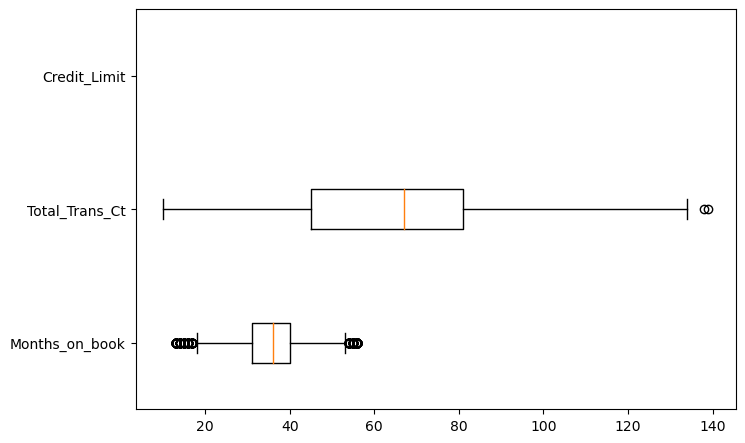

In [55]:
# create box plots
# SET FIGURE SIZE
fig = plt.figure(figsize=(6,4))
# CREATE AXIS INSTANCES
ax = fig.add_axes( [0,0,1,1] )
# CREATE BOXPLOT
plt.boxplot([months_on_bk,total_trans_ct,C_R], vert = 0)
# SET Y-AXIS LABELS
ax.set_yticklabels( ['Months_on_book','Total_Trans_Ct','Credit_Limit'] )

# DISPLAY THE BOXPLOT
plt.show()

## Identify and display the count of missing values 

In [36]:
churn_data.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

## Perforn data imputation

In [37]:
churn_copy.dropna(inplace = True)

In [38]:
churn_copy.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

# Save cleaned data to a csv file 

In [48]:
churn_copy

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [64]:
churn_copy.to_csv('churn_cl',index = False)